# Make Report Figures

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-whitegrid')
SMA_N = 100

IMPALA: lack of progress on hardest scenario 

In [3]:
full_cold = pd.read_csv('~/logs/torchbeast/11v11_full_cold/logs.csv').dropna().query("step <= 3e7")
full_cold.shape

(7275, 8)

In [4]:
full_cold['rolling_return'] = full_cold['mean_episode_return'].ewm(SMA_N).mean()
full_cold['rolling_std'] = full_cold['mean_episode_return'].ewm(SMA_N).std()
full_cold['rolling_loss'] = full_cold['pg_loss'].ewm(SMA_N).mean()

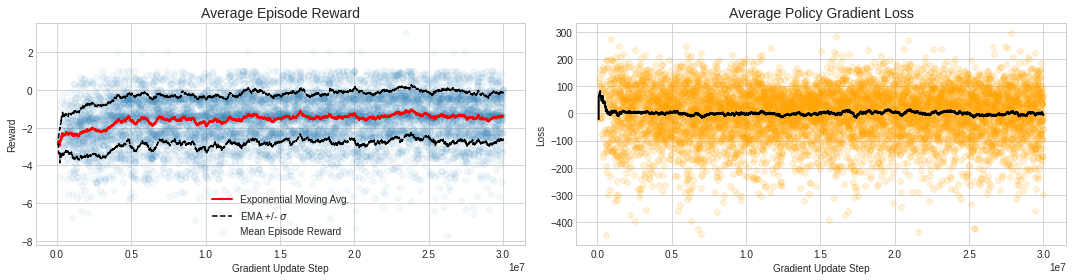

In [5]:
fig = plt.figure(figsize=(15, 4))
ax0 = fig.add_subplot(121)
ax0.scatter("step", "mean_episode_return", data=full_cold, alpha=0.05, label="Mean Episode Reward")
ax0.plot("step", 'rolling_return', data=full_cold, lw=2, c='red', label=f"Exponential Moving Avg.")
ax0.plot(full_cold['step'], full_cold['rolling_return'] - full_cold['rolling_std'], ls = '--', color='black')
ax0.plot(full_cold['step'], full_cold['rolling_return'] + full_cold['rolling_std'], ls = '--', color='black', label="EMA +/- $\sigma$")
ax0.set_title("Average Episode Reward", fontsize=14)
ax0.set_ylabel("Reward")
ax0.set_xlabel("Gradient Update Step")
ax0.legend()

ax1 = fig.add_subplot(122)
ax1.scatter("step", "pg_loss", data=full_cold, alpha=0.15, c='orange')
ax1.plot("step", 'rolling_loss', data=full_cold, lw=2, c='black')
ax1.set_title("Average Policy Gradient Loss", fontsize=14)
ax1.set_ylabel("Loss")
ax1.set_xlabel("Gradient Update Step")

plt.tight_layout()
plt.savefig('figures/30M_full_no_curriculum.png')
plt.show()

### With & Without Curriculum

In [6]:
curriculum = pd.read_csv('~/logs/torchbeast/counter_curriculum/logs.csv')
baseline = pd.read_csv('~/logs/torchbeast/counter_baseline/logs.csv')

In [58]:
COMPARISON_N = 250

In [59]:
c_start = curriculum['mean_episode_return'].iloc[:COMPARISON_N]
b_start = baseline['mean_episode_return'].iloc[:COMPARISON_N]

c_finish = curriculum['mean_episode_return'].iloc[-COMPARISON_N:]
b_finish = baseline['mean_episode_return'].iloc[-COMPARISON_N:]

/opt/conda/envs/football/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/football/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/football/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

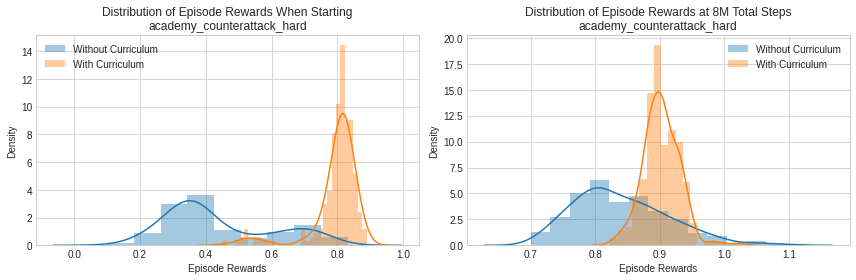

In [65]:
fig = plt.figure(figsize=(12, 4))
ax0 = fig.add_subplot(121)
sns.distplot(b_start, label="Without Curriculum", kde=True, ax=ax0)
sns.distplot(c_start, label="With Curriculum", kde=True, ax=ax0)
ax0.set_title("Distribution of Episode Rewards When Starting\nacademy_counterattack_hard")
ax0.set_xlabel("Episode Rewards")
plt.legend()

ax1 = fig.add_subplot(122)
sns.distplot(b_finish, label="Without Curriculum", kde=True, ax=ax1)
sns.distplot(c_finish, label="With Curriculum", kde=True, ax=ax1)
ax1.set_title("Distribution of Episode Rewards at 8M Total Steps\nacademy_counterattack_hard")
ax1.set_xlabel("Episode Rewards")
plt.legend()

plt.tight_layout()
plt.savefig('figures/curriculum_comparison.png')
plt.show()